### In KNN we have to compare the query with every training example to figure out the class/cluster, in KMeans we do some preprocessing. Let us say that we have 4 clusters, then we figure out 4 centers for each of the clusters in the preprocessing. Whenever we have to predict for a new test example, we can just check with the 4 centers instead of all the examples in the training dataset.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#mean and covariances to generate a random normal distribution in 2 dimensions
#
mean_01 = np.asarray([1.0, 3.0])
mean_02 = np.asarray([-1.0, 0.0])
mean_03 = np.asarray([3.0, -1.0])
mean_04 = np.asarray([-2.0, 4.0])


cov_01 = np.array([[0.8, 0.3], [0.3, 0.9]])
cov_02 = np.array([[0.9, 0.4], [0.4, 0.8]])
cov_03 = np.array([[0.8, 0.3], [0.3, 0.9]])
cov_04 = np.array([[0.9, 0.4], [0.4, 0.8]])


dist_01 = np.random.multivariate_normal(mean_01, cov_01, 200)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 200)
dist_03 = np.random.multivariate_normal(mean_03, cov_03, 200)
dist_04 = np.random.multivariate_normal(mean_04, cov_04, 200)

print(dist_01.shape, dist_02.shape, dist_03.shape, dist_04.shape)

(200, 2) (200, 2) (200, 2) (200, 2)


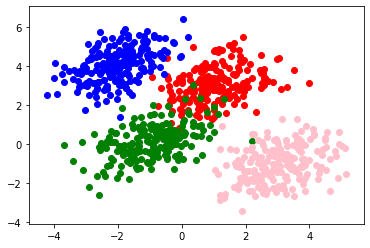

In [3]:
plt.figure(0)
plt.scatter(dist_01[:, 0], dist_01[:, 1], color='red')
plt.scatter(dist_02[:, 0], dist_02[:, 1], color='green')
plt.scatter(dist_03[:, 0], dist_03[:, 1], color='pink')
plt.scatter(dist_04[:, 0], dist_04[:, 1], color='blue')
plt.show()

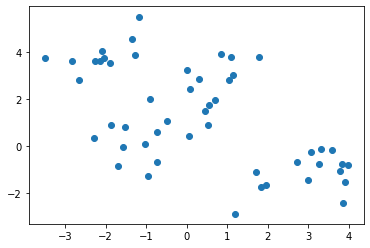

In [4]:
data_prep = np.zeros((800, 2))
#data prep for visualisation purposes in the end
data_prep[:200, :] = dist_01
data_prep[200:400, :] = dist_02
data_prep[400:600, :] = dist_03
data_prep[600:800, :] = dist_04
data = np.array(data_prep[:, :])

#shuffling data
np.random.shuffle(data)



#checking first 50 points, 
#x, y should range same as above
plt.figure(0)
plt.scatter(data[:50, 0], data[:50, 1])
plt.show()

In [5]:
class KMeansClustering:
    def __init__(self):
        self.X = None
        self.num_clusters = None
        self.stop_iter = None
        self.clusters = {}
    
    def update_centers(self):
        num_examples = self.X.shape[0]
        for cur_iter in range(self.stop_iter):
            #clear all the points for a center
            for ix in range(self.num_clusters):
                self.clusters[ix]['points'] = []
            #fill in the fresh points for a center
            for ix in range(num_examples):
                min_dist_index = 0
                min_dist = self.dist(self.X[ix], self.clusters[0]['center'])
                #put every training example into a cluster group
                for clus_num in range(1, self.num_clusters):
                    dist_with_cur_cluster = self.dist(self.X[ix], self.clusters[clus_num]['center'])
                    if dist_with_cur_cluster < min_dist:
                        min_dist = dist_with_cur_cluster
                        min_dist_index = clus_num
                self.clusters[min_dist_index]['points'].append(self.X[ix])
            #update a cluster center from the points given to it
            for clus_num in range(self.num_clusters):
                self.clusters[clus_num]['center'] = np.asarray(self.clusters[clus_num]['points']).mean(axis=0)
    
        
    def fit(self, X, num_clusters, stop_iter=10, normalize=False):
        #normalize the data
        if normalize:
            X = (X-X.mean(axis=0))/X.std(axis=0)
        self.X = X
        self.num_clusters = num_clusters
        self.stop_iter = stop_iter
        
        dimension_X = X.shape
        centers = np.random.uniform(low=self.X.min(), high=self.X.max(), size=(self.num_clusters, dimension_X[1]))
        #print(centers.shape)
        
        #enter the k centers and their corresponding clusters in 
        #self.clusters, it is a dictionary with center and points belonging to that cluster
        for ix in range(num_clusters):
            self.clusters[ix] = {
                'center' : centers[ix],
                'points' : []
            }
        
        self.update_centers()
    
    def get_centers(self):
        centers = []
        for ix in range(self.num_clusters):
            centers.append(self.clusters[ix]['center'])
        return centers
        
    def dist(self, p1, p2):
        return np.sqrt(((p1-p2)**2).sum())
    

In [6]:
k_means = KMeansClustering()

In [7]:
k_means.fit(data, 4, 50)

[[-2.03673453  4.04493286]
 [ 1.08377985  3.02659502]
 [ 3.02874419 -1.01170135]
 [-1.0307847   0.04817075]]


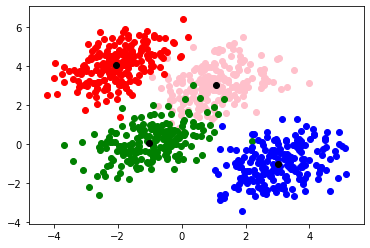

In [8]:
centers = np.asarray(k_means.get_centers())
plt.figure(0)
plt.scatter(data_prep[:200, 0], data_prep[:200, 1], color='pink')
plt.scatter(data_prep[200:400, 0], data_prep[200:400, 1], color='green')
plt.scatter(data_prep[400:600, 0], data_prep[400:600, 1], color='blue')
plt.scatter(data_prep[600:800, 0], data_prep[600:800, 1], color='red')
#plot the centers in the black
plt.scatter(centers[:, 0], centers[:, 1], color='black')
print(centers)
plt.show()